Matplotlib is building the font cache; this may take a moment.


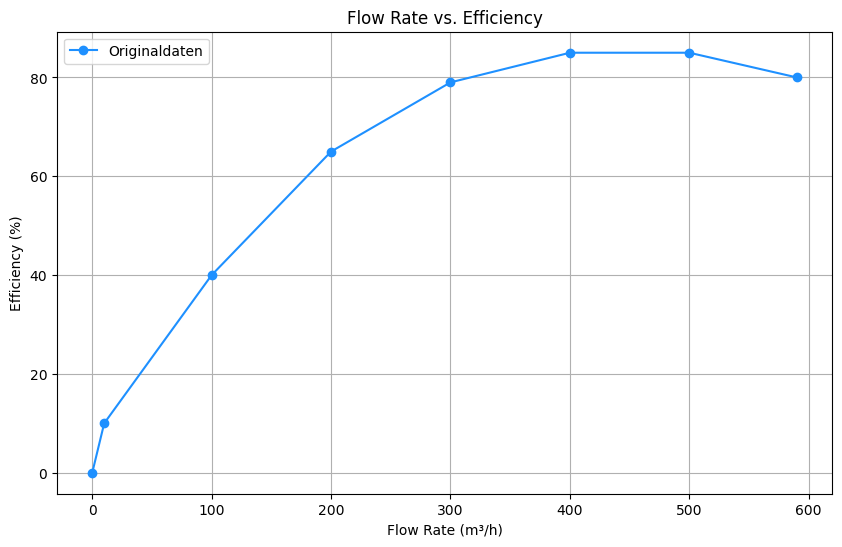

Overall Hydraulic Power: 19886.03 kW
Average Efficiency: 69.28 %
Overall power loss: 7930.14 kW


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# import all necessary data
df_1 = pd.read_csv("volume_flow_data.csv")

data_2 = {
    "Flow Rate (m³/h)": [0, 10, 100, 200, 300, 400, 500, 590],
    "Efficiency (%)": [0, 10, 40, 65, 79, 85, 85, 80]
}

# DataFrame aus dem Dictionary erstellen
df_2 = pd.DataFrame(data_2)

# Plot der Originaldaten
plt.figure(figsize=(10, 6))
plt.plot(df_2["Flow Rate (m³/h)"], df_2["Efficiency (%)"], marker="o", linestyle="-", color="dodgerblue", label="Originaldaten")
plt.xlabel("Flow Rate (m³/h)")
plt.ylabel("Efficiency (%)")
plt.title("Flow Rate vs. Efficiency")
plt.grid(True)
plt.legend()
plt.show()

# Define constants for hydraulic power calculation:
rho = 1000      # Density of water (kg/m³)
g = 9.81        # Gravitational acceleration (m/s²)
z = 20          # Pump head in meters

df_1["Q (m^3/s)"] = df_1["Volume Flow (m^3/h)"] / 3600

# ============================================
#            Teilaufgabe 1
# ============================================

# Für jede Zeile den hydraulischen Leistungswert berechnen
df_1["Hydraulic Power (kW)"] =(rho * g * z * df_1["Q (m^3/s)"] / 1000).round(2)

total_hydraulic_power = df_1["Hydraulic Power (kW)"].sum()

print("Overall Hydraulic Power: {} kW".format(total_hydraulic_power))

# ============================================
#           Teilaufgabe 2
# ============================================

x_known = df_2["Flow Rate (m³/h)"].values
y_known = df_2["Efficiency (%)"].values

f_efficiency = interp1d(x_known, y_known, kind='linear', fill_value="extrapolate")

df_1["Computed Efficiency (%)"] = f_efficiency(df_1["Volume Flow (m^3/h)"].values).round(2)

average_computed_efficiency = df_1 ["Computed Efficiency (%)"].mean()

print("Average Efficiency: {:.2f} %".format(average_computed_efficiency))

# ============================================
#           Teilaufgabe 3
# ============================================

f_power = df_1["Hydraulic Power (kW)"] * 100 / df_1["Computed Efficiency (%)"]

# Speichere das gerundete Ergebnis in einer neuen Spalte:
df_1["overall power (kW)"] = f_power.round(2)

f_loss = df_1["overall power (kW)"] -  df_1["Hydraulic Power (kW)"]

df_1["power loss (kW)"] =  f_loss.round(2)

total_power_loss = df_1["power loss (kW)"].sum()

print("Overall power loss: {:.2f} kW".format(total_power_loss))